In [ ]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np


experiment_name = "several_weights_simple_very_slow"
game = "Enduro"
show_dqn = True; show_prodqn = True
bellman_iterations_scope = 5
seeds = [1]
p = json.load(open(f"figures/{experiment_name}/parameters.json"))

### Extract data

In [ ]:
if show_dqn:
    dqn_j = np.zeros((len(seeds), p["n_epochs"])) * np.nan

    for idx_seed, seed in enumerate(seeds):
        dqn_j[idx_seed] = np.load(f"figures/{experiment_name}/{game}/DQN/J_{seed}.npy")

if show_prodqn:
    prodqn_j = np.zeros((len(seeds), p["n_epochs"])) * np.nan

    for idx_seed, seed in enumerate(seeds):
        prodqn_j[idx_seed] = np.load(f"figures/{experiment_name}/{game}/ProDQN/{bellman_iterations_scope}_J_{seed}.npy")

### Plot performance

In [ ]:
import matplotlib.pyplot as plt 
from experiments import colors

from pbo.utils.confidence_interval import means_and_confidence_interval

fig = plt.gcf()
fig.set_size_inches(5.5, 7.5)
plt.rc("font", size=22)
plt.rc("lines", linewidth=3)

cut = 19
iterations = range(1, p["n_epochs"] + 1)[:cut]


if show_dqn:
    dqn_j_mean, dqn_j_confidence_interval = means_and_confidence_interval(dqn_j)

    plt.plot(iterations, dqn_j_mean[:cut], label="DQN", color=colors["DQN"], zorder=2)
    plt.fill_between(iterations, dqn_j_confidence_interval[0, :cut], dqn_j_confidence_interval[1, :cut], color=colors["DQN"], alpha=0.3)

if show_prodqn:
    prodqn_j_mean, prodqn_j_confidence_interval = means_and_confidence_interval(prodqn_j)

    plt.plot(iterations, prodqn_j_mean[:cut], label="ProDQN (ours)", color=colors["ProDQN"], zorder=3)
    plt.fill_between(iterations, prodqn_j_confidence_interval[0, :cut], prodqn_j_confidence_interval[1, :cut], color=colors["ProDQN"], alpha=0.3)

plt.xticks(range(1, cut, cut // 4))
plt.xlabel(r"#Epochs ($4 \times 10^5$ iterations)")
plt.title(rf"$J_i$ in {game}")
plt.legend().set_zorder(10)
plt.grid(zorder=0)

_ = plt.savefig(f"figures/{experiment_name}/{game}/J_{bellman_iterations_scope}.pdf", bbox_inches='tight')

In [ ]:
# dqn_j_mean_pong = dqn_j_mean
# dqn_j_confidence_interval_pong = dqn_j_confidence_interval

# prodqn_j_mean_pong = prodqn_j_mean
# prodqn_j_confidence_interval_pong = prodqn_j_confidence_interval

In [ ]:
# dqn_j_mean_enduro = dqn_j_mean
# dqn_j_confidence_interval_enduro = dqn_j_confidence_interval

# prodqn_j_mean_enduro = prodqn_j_mean
# prodqn_j_confidence_interval_enduro = prodqn_j_confidence_interval

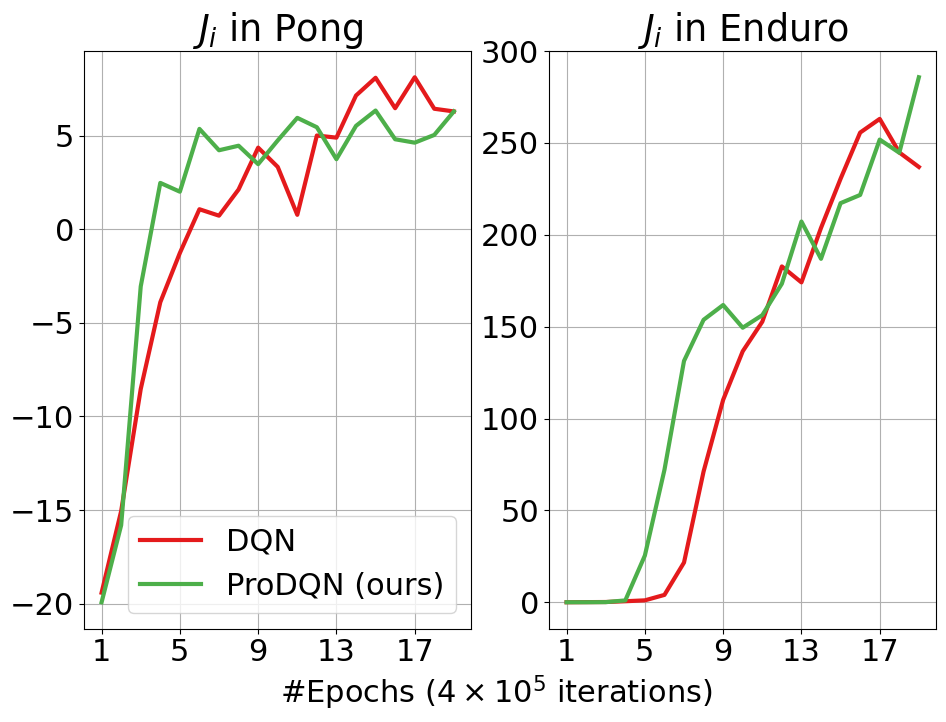

In [77]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=22)
plt.rc("lines", linewidth=3)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 7.5))

plt.rc("font", size=22)
plt.rc("lines", linewidth=3)

cut = 19
iterations = range(1, p["n_epochs"] + 1)[:cut]


axs[0].plot(iterations, dqn_j_mean_pong[:cut], label="DQN", color=colors["DQN"], zorder=2)
axs[0].fill_between(iterations, dqn_j_confidence_interval_pong[0, :cut], dqn_j_confidence_interval_pong[1, :cut], color=colors["DQN"], alpha=0.3)

axs[0].plot(iterations, prodqn_j_mean_pong[:cut], label="ProDQN (ours)", color=colors["ProDQN"], zorder=3)
axs[0].fill_between(iterations, prodqn_j_confidence_interval_pong[0, :cut], prodqn_j_confidence_interval_pong[1, :cut], color=colors["ProDQN"], alpha=0.3)

axs[0].set_xticks(range(1, cut, cut // 4))
# axs[0].set_xlabel(r"#Epochs ($4 \times 10^5$ iterations)")
axs[0].set_title(r"$J_i$ in Pong")
axs[0].legend().set_zorder(10)
axs[0].grid(zorder=0)

axs[1].plot(iterations, dqn_j_mean_enduro[:cut], label="DQN", color=colors["DQN"], zorder=2)
axs[1].fill_between(iterations, dqn_j_confidence_interval_enduro[0, :cut], dqn_j_confidence_interval_enduro[1, :cut], color=colors["DQN"], alpha=0.3)

axs[1].plot(iterations, prodqn_j_mean_enduro[:cut], label="ProDQN (ours)", color=colors["ProDQN"], zorder=3)
axs[1].fill_between(iterations, prodqn_j_confidence_interval_enduro[0, :cut], prodqn_j_confidence_interval_enduro[1, :cut], color=colors["ProDQN"], alpha=0.3)

axs[1].set_xticks(range(1, cut, cut // 4))
# axs[1].set_xlabel(r"#Epochs ($4 \times 10^5$ iterations)")
axs[1].set_title(r"$J_i$ in Enduro")
# axs[1].legend().set_zorder(10)
axs[1].grid(zorder=0)

fig.suptitle(r"#Epochs ($4 \times 10^5$ iterations)", y=0.05, fontsize=22)

_ = plt.savefig(f"figures/{experiment_name}/J_{bellman_iterations_scope}.pdf", bbox_inches='tight')